In [ ]:
# TCC: O Potencial da Inteligência Artificial na Gestão de Negócios e Projetos:
#      Um Estudo sobre o ChatGPT como Ferramenta de Apoio à Análise de Dados e Tomada de Decisão.
#
# Aluno: Carlos Fernando Rosário Sinésio


Código com a conexão API ao Openai para o ChatGpt

In [ ]:
pip install -q openai

In [ ]:
#Importando bibliotecas
from pathlib import Path
import pandas as pd
import openai
import datetime
import matplotlib.pyplot as plt

In [ ]:
credential = {
     'token': '<token>'
     }

In [ ]:
# Importando o token da API do OpenAI
openai.api_key = credential.get('token')

In [ ]:
def obter_resposta_gpt(prompt):
    response = openai.Completion.create(
        engine='text-davinci-003',
        prompt=prompt,
        max_tokens=900,
        n=1,
        stop=None,
        temperature=0.7,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    return response.choices[0].text.strip()

In [ ]:
#Função para perguntar ao ChatGpt
def perguntar_chagpt(dados, pergunta):
    prompt = f"Com o resultado desses dados: {dados} , {pergunta}"
    resposta_gpt = obter_resposta_gpt(prompt)
    return resposta_gpt

01 - Indicadores de Bugs

In [ ]:
%%time
# Importando de um repositório no github com os dados dos Indicadores de Bugs
data = pd.read_csv('https://raw.githubusercontent.com/Fernandosinesio/TCC-Fernando_Sinesio/main/data/bugs.csv', header=0)
data.head(30)

CPU times: user 21.8 ms, sys: 1.74 ms, total: 23.5 ms
Wall time: 180 ms


,tipo,total,ano
0,impeditivos_fechados,263,2022
1,impeditivos_abertos,263,2022
2,fechados,430,2022
3,abertos,433,2022
4,fechados,478,2021
5,abertos,489,2021
6,impeditivos_fechados,264,2021
7,impeditivos_abertos,264,2021
8,abertos,494,2020
9,fechados,489,2020


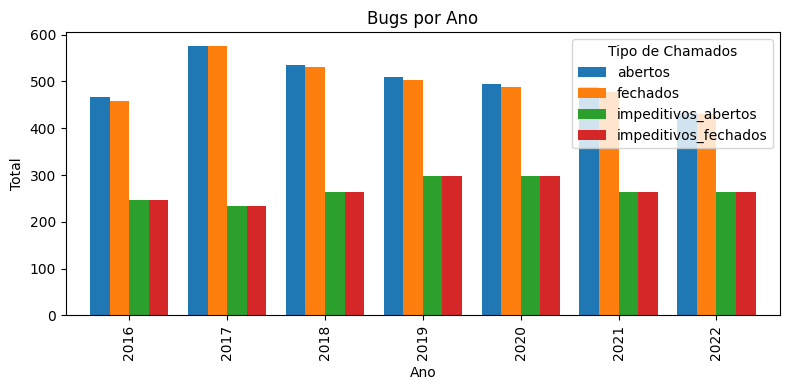

In [ ]:
#Ilustração gráfica dos dados

grouped_data = data.pivot(index='ano', columns='tipo', values='total')

grouped_data.plot(kind='bar', width=0.8, figsize=(8, 4))

plt.xlabel('Ano')
plt.ylabel('Total')
plt.title('Bugs por Ano')
plt.legend(title='Tipo de Chamados')

plt.tight_layout()
plt.show()

In [ ]:
print('')
pergunta = "Interprete, de maneira resumida, esses resultados ano a ano em forma de tendência,\
            identificando tendências e oscilações,\
            contextualizando e embasando a tomada de decisão,\
            sugerindo ao final uma análise técnica auxiliando na tomada de decisão"
#resposta_gpt = perguntar_chagpt(data,pergunta)
print("Resposta do ChatGpt:")
print(f"{resposta_gpt}")


Resposta do ChatGpt:
para melhor compreensão da leitura.

Em 2022, houve uma estabilidade entre os impeditivos fechados e abertos, com 263 para cada. Já em 2021, houve um aumento significativo na quantidade de impeditivos abertos, com 489 em comparação aos 478 fechados. Em 2020, houve um aumento nos impeditivos abertos, com 494, e uma leve queda nos impeditivos fechados, com 489.

Em 2019, houve um aumento significativo na quantidade de impeditivos abertos, com 509, e uma leve queda nos impeditivos fechados, com 502. Em 2018, houve um aumento na quantidade de impeditivos abertos com 534 e também uma leve queda nos impeditivos fechados com 531.

Em 2017, houve um aumento na quantidade de impeditivos abertos com 576 e uma leve queda nos impeditivos fechados com 575. Em 2016, houve um aumento significativo na quantidade de impeditivos abertos, com 467, e uma leve queda nos impeditivos fechados, com 458.

De maneira geral, houve uma tendência de crescimento nos impeditivos abertos, enquan

02 - Desempenho do Time

In [ ]:
%%time
# Importando de um repositório no github com os dados dos Indicadores de Bugs
data = pd.read_csv('https://raw.githubusercontent.com/Fernandosinesio/TCC-Fernando_Sinesio/main/data/desempenho_time.csv', header=0)
data.head(30)

CPU times: user 10.9 ms, sys: 3.85 ms, total: 14.7 ms
Wall time: 60.4 ms


,ano,desempenho,valor
0,2018,Meta,280
1,2018,Realizado,141
2,2019,Meta,560
3,2019,Realizado,523
4,2020,Meta,550
5,2020,Realizado,480
6,2021,Meta,550
7,2021,Realizado,510
8,2022,Meta,560
9,2022,Realizado,525


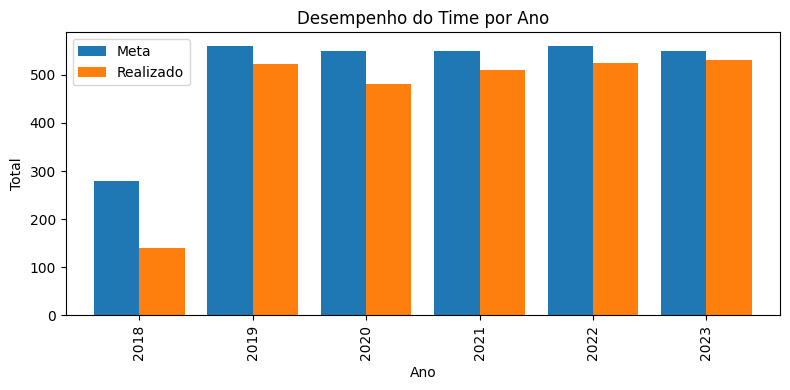

In [ ]:
#Ilustração gráfica dos dados

grouped_data = data.pivot(index='ano', columns='desempenho', values='valor')

grouped_data.plot(kind='bar', width=0.8, figsize=(8, 4))

plt.xlabel('Ano')
plt.ylabel('Total')
plt.title('Desempenho do Time por Ano')
plt.legend(title='')

plt.tight_layout()
plt.show()

In [ ]:
print('')
pergunta = "Interprete esses resultados ano a ano em forma de tendência,\
            identificando tendências e oscilações,\
            contextualizando e embasando a tomada de decisão,\
            sugerindo ao final uma análise técnica auxiliando na tomada de decisão."
resposta_gpt = perguntar_chagpt(data,pergunta)
print("Resposta do ChatGpt:")
print(f"{resposta_gpt}")


Resposta do ChatGpt:
Analisando o desempenho dos anos de 2018 a 2023, pode-se perceber que houve um crescimento constante no valor realizado ao longo dos anos, mas o crescimento foi mais acentuado entre 2019 e 2021. Em 2018, o valor realizado foi de 141, abaixo da meta estabelecida de 280. Em 2019, o valor realizado aumentou para 523, com metas estabelecidas em 560, o que significa que houve um crescimento de mais de 300%. Em 2020, o valor realizado foi de 480, bem próximo à meta de 550. Em 2021, o valor realizado aumentou para 510, com metas estabelecidas em 550. Em 2022, o valor realizado foi de 525, superando a meta de 560. Por fim, em 2023, o valor realizado foi de 530, superando a meta de 550.

Portanto, podemos concluir que houve um crescimento constante no desempenho ao longo dos anos, com as metas sendo superadas desde 2022. Em termos de análise técnica, as metas e os valores realizados devem ser observados para identificar os principais fatores que estão influenciando esse cr